In [ ]:
import numpy as np
import pandas as pd
import matplotlib as matplot
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.offline as py
from sklearn.preprocessing import LabelEncoder,StandardScaler, MinMaxScaler

In [ ]:
#Read the dataset
dataset = pd.read_csv('HR_Employee_Attrition.csv')

# copy the dataset for modification 
datasetLast=dataset.copy()

In [ ]:
print("Data Count="+str(len(datasetLast)))

Data Count=1470


In [ ]:
# we can see general information abour columns.
# we see that there are some null columns fron the Non-null count
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1258 non-null   float64
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1339 non-null   object 
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   object 
 8   EnvironmentSatisfaction   1470 non-null   int64  
 9   Gender                    1395 non-null   object 
 10  HourlyRate                1470 non-null   int64  
 11  JobInvolvement            1470 non-null   int64  
 12  JobLevel                  1470 non-null   int64  
 13  JobRole                   1470 non-null   object 
 14  JobSatis

In [ ]:
#store noncontinueos column names
disCol = []
for column in dataset.columns:
    if (dataset[column].dtypes==object):
        disCol.append(column)

In [ ]:
#statistical information about columns
dataset.describe()

Age    DailyRate  ...  YearsSinceLastPromotion  YearsWithCurrManager
count  1258.000000  1470.000000  ...              1470.000000           1470.000000
mean     37.115262   802.485714  ...                 2.187755              4.123129
std       9.068654   403.509100  ...                 3.222430              3.568136
min      18.000000   102.000000  ...                 0.000000              0.000000
25%      30.000000   465.000000  ...                 0.000000              2.000000
50%      36.000000   802.000000  ...                 1.000000              3.000000
75%      43.000000  1157.000000  ...                 3.000000              7.000000
max      60.000000  1499.000000  ...                15.000000             17.000000

[8 rows x 24 columns]

In [ ]:
#only string columns informations
dataset.describe(include=[object])

Attrition BusinessTravel  ... Over18 OverTime
count       1470           1339  ...   1002     1470
unique         2              3  ...      1        2
top           No  Travel_Rarely  ...      Y       No
freq        1233            947  ...   1002     1054

[4 rows x 9 columns]

In [ ]:
#check for duplicates and clean
dup=datasetLast.drop_duplicates()
dup.shape

(1470, 33)

In [ ]:
#Array with numerical features
numerical_cols=['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 
                                    'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
                                   'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 
                                    'YearsInCurrentRole' , 'YearsSinceLastPromotion' , 'YearsWithCurrManager' ]
#Array with categorical features
categorical_cols=['OverTime', 'Gender', 'BusinessTravel', 'Education', 'EducationField', 'Department',
      'EnvironmentSatisfaction', 'JobLevel','JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 
      'RelationshipSatisfaction']

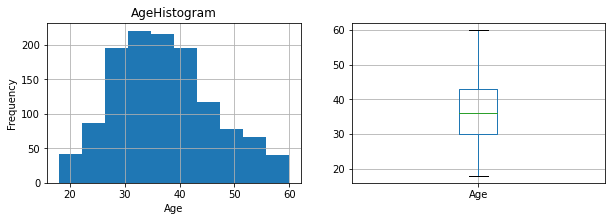

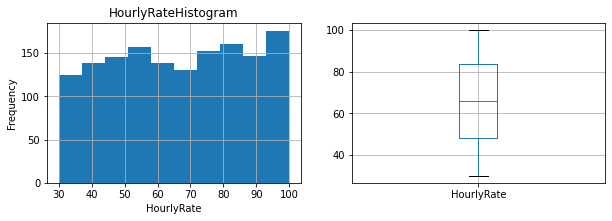

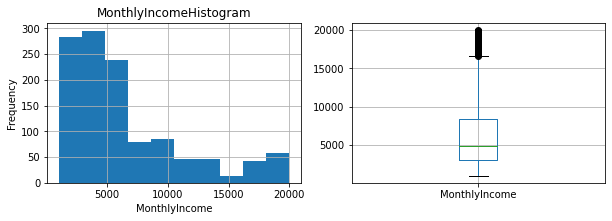

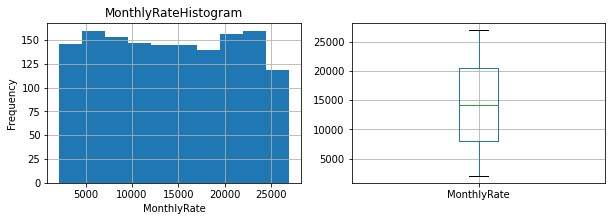

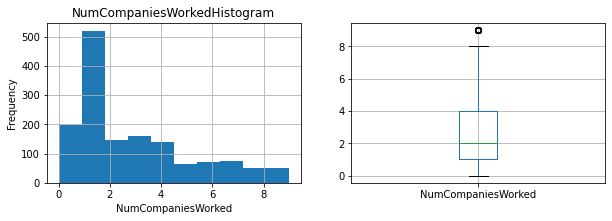

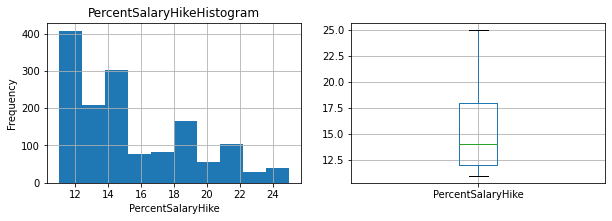

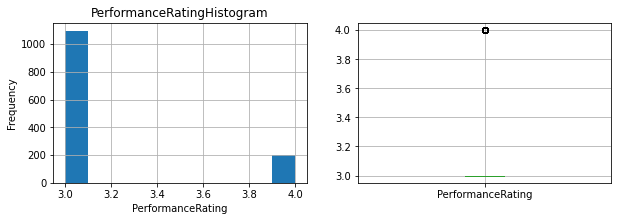

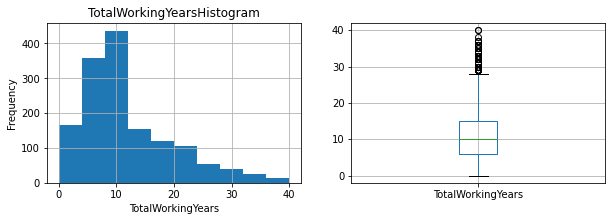

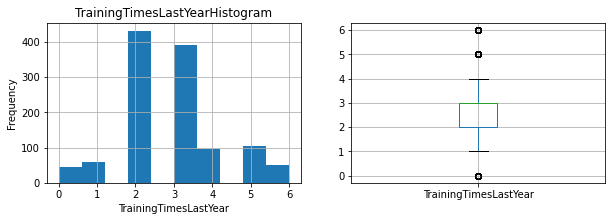

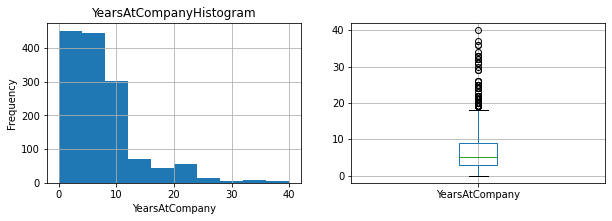

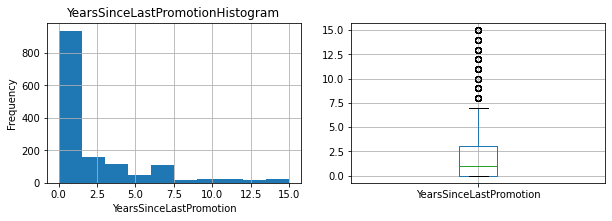

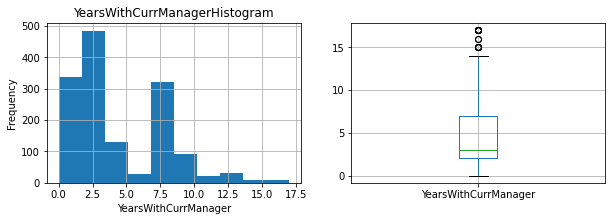

In [ ]:
#hisrogram and boxplot graphs for numerical features
for attr in numerical_cols:            
    fig = plt.figure(figsize=(10, 10)) 
    fig_dims = (3, 2)
    
    #Histogram
    plt.subplot2grid(fig_dims, (0, 0))
    dataset[attr].hist()
    plt.title(attr+ "Histogram")
    plt.xlabel(attr)
    plt.ylabel('Frequency')

    #Boxplot
    plt.subplot2grid(fig_dims, (0, 1))
    dataset.boxplot(column=[attr])

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

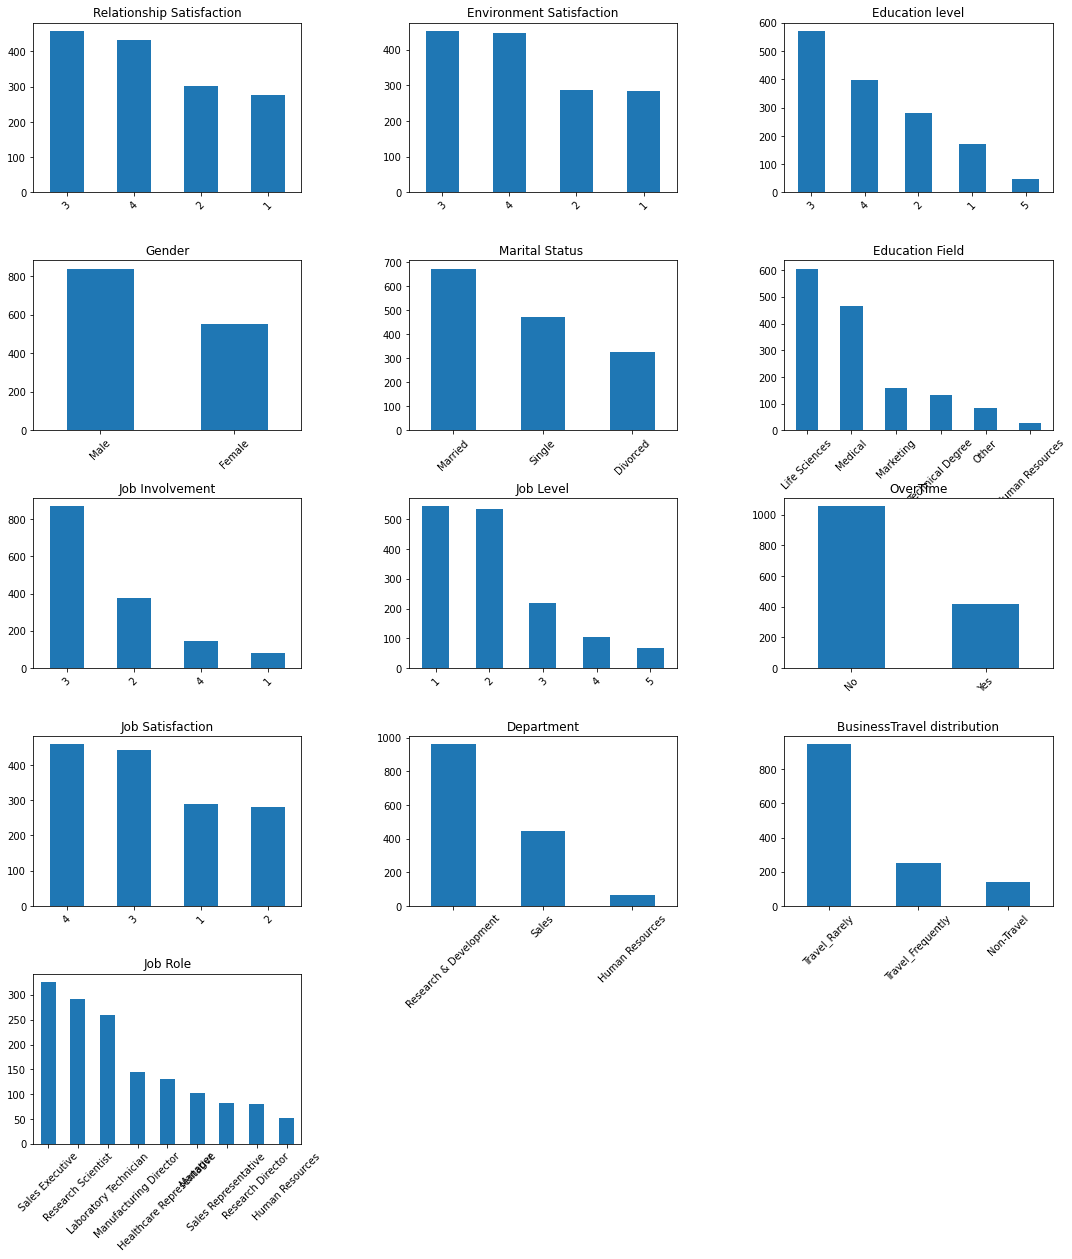

In [ ]:
#graphs for categorical features

# Set up a grid of plots
fig = plt.figure(figsize=(25,25))
fig_dims = (6,4)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

plt.subplot2grid(fig_dims, (3,2))
dataset['BusinessTravel'].value_counts().plot(kind='bar', title='BusinessTravel distribution')
plt.xticks(rotation=45)

plt.subplot2grid(fig_dims, (3,1))
dataset['Department'].value_counts().plot(kind='bar', title='Department')
plt.xticks(rotation=45)

plt.subplot2grid(fig_dims, (0,2))
dataset['Education'].value_counts().plot(kind='bar', title='Education level')
plt.xticks(rotation=45)

plt.subplot2grid(fig_dims, (1,2))
dataset['EducationField'].value_counts().plot(kind='bar', title='Education Field')
plt.xticks(rotation=45)

plt.subplot2grid(fig_dims, (0,1))
dataset['EnvironmentSatisfaction'].value_counts().plot(kind='bar', title='Environment Satisfaction')
plt.xticks(rotation=45)

plt.subplot2grid(fig_dims, (1,0))
dataset['Gender'].value_counts().plot(kind='bar', title='Gender')
plt.xticks(rotation=45)

plt.subplot2grid(fig_dims, (2,0))
dataset['JobInvolvement'].value_counts().plot(kind='bar', title='Job Involvement')
plt.xticks(rotation=45)

plt.subplot2grid(fig_dims, (2,1))
dataset['JobLevel'].value_counts().plot(kind='bar', title='Job Level')
plt.xticks(rotation=45)

plt.subplot2grid(fig_dims, (4,0))
dataset['JobRole'].value_counts().plot(kind='bar', title='Job Role')
plt.xticks(rotation=45)

plt.subplot2grid(fig_dims, (3,0))
dataset['JobSatisfaction'].value_counts().plot(kind='bar', title='Job Satisfaction')
plt.xticks(rotation=45)

plt.subplot2grid(fig_dims, (1,1))
dataset['MaritalStatus'].value_counts().plot(kind='bar', title='Marital Status ')
plt.xticks(rotation=45)

plt.subplot2grid(fig_dims, (0,0))
dataset['RelationshipSatisfaction'].value_counts().plot(kind='bar', title='Relationship Satisfaction')
plt.xticks(rotation=45)

plt.subplot2grid(fig_dims, (2,2))
dataset['OverTime'].value_counts().plot(kind='bar', title='OverTime')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

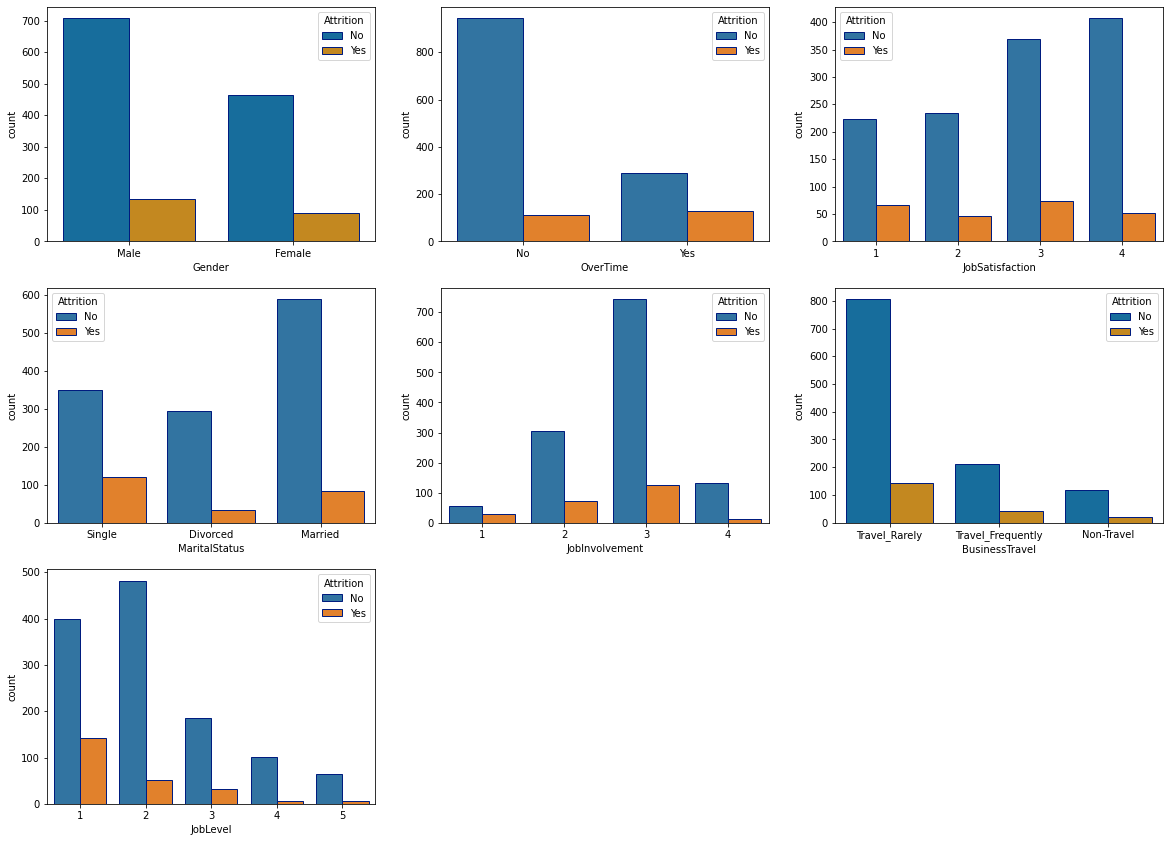

In [ ]:
fig = plt.figure(figsize=(20,25))
fig_dims = (5,3)

plt.subplot2grid(fig_dims, (2,2))
sb.countplot(x='BusinessTravel', hue='Attrition', data = dataset, palette="colorblind",  edgecolor=sb.color_palette("dark", n_colors = 1))
plt.xticks(rotation=0)

plt.subplot2grid(fig_dims, (1,0))
sb.countplot(x='Gender', hue='Attrition', data = dataset, palette="colorblind",  edgecolor=sb.color_palette("dark", n_colors = 1))
plt.xticks(rotation=0)

plt.subplot2grid(fig_dims, (2,1))
sb.countplot(x='JobInvolvement', hue='Attrition', data = dataset, edgecolor=sb.color_palette("dark", n_colors = 1));
plt.xticks(rotation=0)

plt.subplot2grid(fig_dims, (1,1))
sb.countplot(x='OverTime', hue='Attrition', data = dataset, edgecolor=sb.color_palette("dark", n_colors = 1));
plt.xticks(rotation=0)

plt.subplot2grid(fig_dims, (2,0))
sb.countplot(x='MaritalStatus', hue='Attrition', data = dataset, edgecolor=sb.color_palette("dark", n_colors = 1));
plt.xticks(rotation=0)

plt.subplot2grid(fig_dims, (1,2))
sb.countplot(x='JobSatisfaction', hue='Attrition', data = dataset, edgecolor=sb.color_palette("dark", n_colors = 1));
plt.xticks(rotation=0)

plt.subplot2grid(fig_dims, (3,0))
sb.countplot(x='JobLevel', hue='Attrition', data = dataset, edgecolor=sb.color_palette("dark", n_colors = 1));
plt.xticks(rotation=0)

Text(0, 0.5, 'Attrition')

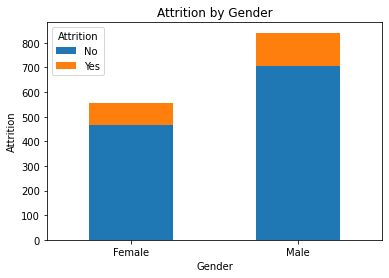

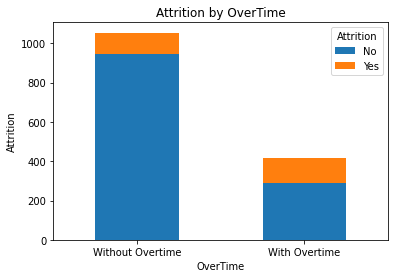

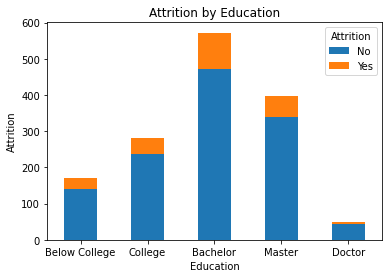

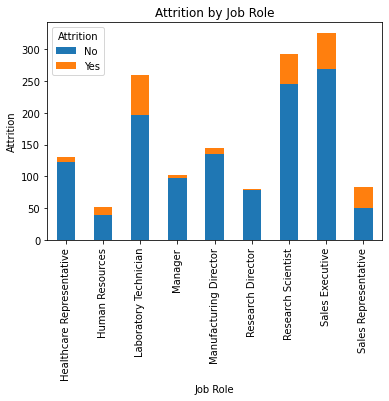

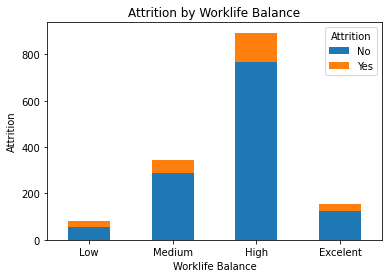

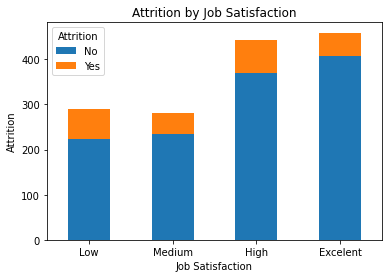

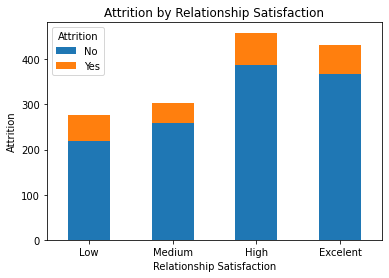

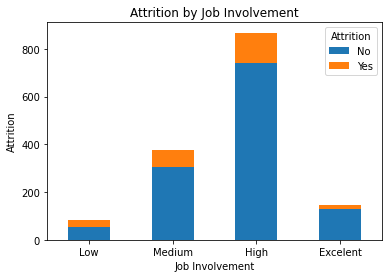

In [ ]:
#attrition distribution over same column

xt = pd.crosstab(dataset['Gender'],dataset['Attrition'])
xt.plot(kind='bar', stacked=True, rot=0)
plt.title('Attrition by Gender')
plt.xlabel('Gender')
plt.ylabel('Attrition')

xt = pd.crosstab(dataset['OverTime'],dataset['Attrition'])
xt=xt.rename({'No':'Without Overtime','Yes':'With Overtime'})
xt.plot(kind='bar', stacked=True, rot=0)
plt.title('Attrition by OverTime')
plt.xlabel('OverTime')
plt.ylabel('Attrition')

xt = pd.crosstab(dataset['Education'],dataset['Attrition'])
xt=xt.rename({3:'Bachelor',4:'Master',2:'College',1:'Below College',5:'Doctor'})
xt.plot(kind='bar', stacked=True, rot=0)
plt.title('Attrition by Education')
plt.xlabel('Education')
plt.ylabel('Attrition')

xt = pd.crosstab(dataset['JobRole'],dataset['Attrition'])
xt.plot(kind='bar', stacked=True)
plt.title('Attrition by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Attrition')

xt = pd.crosstab(dataset['WorkLifeBalance'],dataset['Attrition'])
xt=xt.rename({3:'High',4:'Excelent',2:'Medium',1:'Low'})
xt.plot(kind='bar', stacked=True, rot=0)
plt.title('Attrition by Worklife Balance')
plt.xlabel('Worklife Balance')
plt.ylabel('Attrition')

xt = pd.crosstab(dataset['JobSatisfaction'],dataset['Attrition'])
xt=xt.rename({3:'High',4:'Excelent',2:'Medium',1:'Low'})
xt.plot(kind='bar', stacked=True,rot=0)
plt.title('Attrition by Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Attrition')

xt = pd.crosstab(dataset['RelationshipSatisfaction'],dataset['Attrition'])
xt=xt.rename({3:'High',4:'Excelent',2:'Medium',1:'Low'})
xt.plot(kind='bar', stacked=True, rot=0)
plt.title('Attrition by Relationship Satisfaction')
plt.xlabel('Relationship Satisfaction')
plt.ylabel('Attrition')


xt = pd.crosstab(dataset['JobInvolvement'],dataset['Attrition'])
xt=xt.rename({3:'High',4:'Excelent',2:'Medium',1:'Low'})
xt.plot(kind='bar', stacked=True, rot=0)
plt.title('Attrition by Job Involvement')
plt.xlabel('Job Involvement')
plt.ylabel('Attrition')



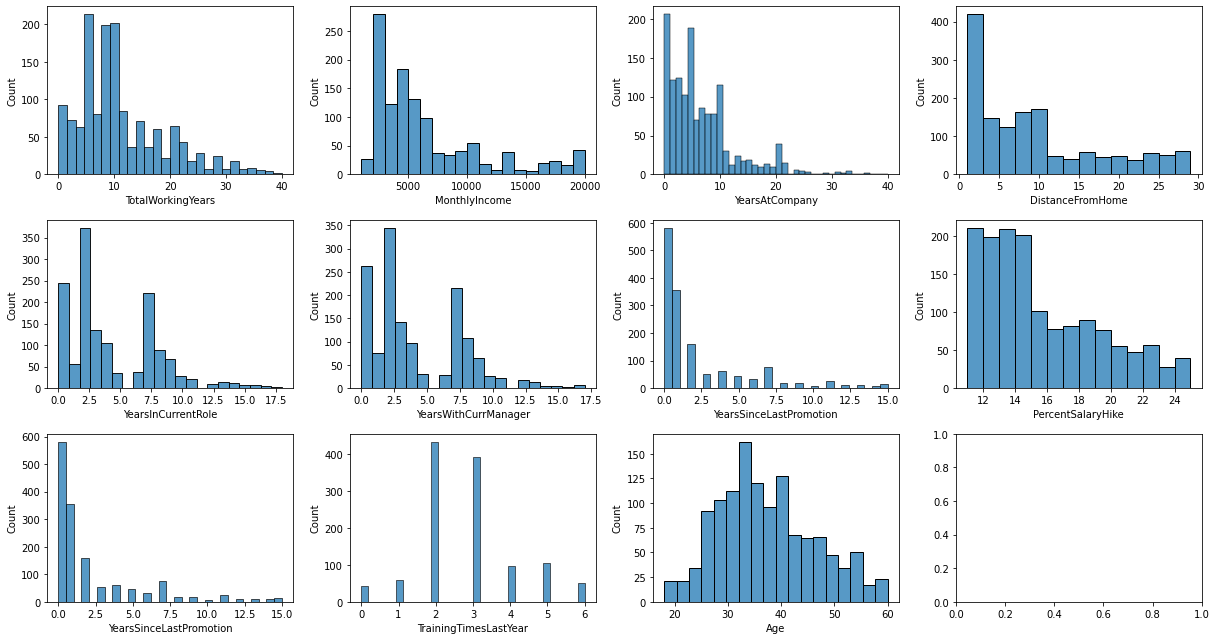

In [ ]:
# Checking the distribution of numerical features
fig,ax = plt.subplots(3,4, figsize=(17,9))

sb.histplot(dataset['TotalWorkingYears'], ax = ax[0,0]) 
sb.histplot(dataset['MonthlyIncome'], ax = ax[0,1]) 
sb.histplot(dataset['YearsAtCompany'], ax = ax[0,2]) 
sb.histplot(dataset['DistanceFromHome'], ax = ax[0,3]) 
sb.histplot(dataset['YearsInCurrentRole'], ax = ax[1,0]) 
sb.histplot(dataset['YearsWithCurrManager'], ax = ax[1,1]) 
sb.histplot(dataset['YearsSinceLastPromotion'], ax = ax[1,2]) 
sb.histplot(dataset['PercentSalaryHike'], ax = ax[1,3]) 
sb.histplot(dataset['YearsSinceLastPromotion'], ax = ax[2,0]) 
sb.histplot(dataset['TrainingTimesLastYear'], ax = ax[2,1]) 
sb.histplot(dataset['Age'], ax = ax[2,2]) 

plt.tight_layout()
plt.show()

## **Inconsistent Values**

In [ ]:
#Age inconsistency check 
#check if there are employees with experience higher than their age.
datasetLast[datasetLast['Age']< datasetLast['TotalWorkingYears']].head()

Age Attrition  ... YearsSinceLastPromotion  YearsWithCurrManager
101  37.0       Yes  ...                      13                     8
173  34.0        No  ...                       0                     4
181  23.0        No  ...                       7                     7
194  31.0        No  ...                      11                     9
195  29.0        No  ...                       0                     9

[5 rows x 33 columns]

In [ ]:
#drop the values
datasetLast.drop(index= datasetLast[datasetLast['Age']< datasetLast['TotalWorkingYears']].index ,inplace=True)

In [ ]:
#check if there are employees who work more years with the manager than in the company itself.
datasetLast[datasetLast['YearsAtCompany'] < datasetLast['YearsWithCurrManager'] ].head()

Age Attrition  ... YearsSinceLastPromotion  YearsWithCurrManager
0  52.0        No  ...                       2                    13
1  36.0        No  ...                       1                     6
2   NaN        No  ...                       1                     2
3  33.0        No  ...                       0                     7
5  35.0        No  ...                       0                     3

[5 rows x 33 columns]

In [ ]:
#drop the values
datasetLast.drop(index= datasetLast[datasetLast['YearsAtCompany'] < datasetLast['YearsWithCurrManager']].index ,inplace=True)

In [ ]:
datasetLast[datasetLast['YearsAtCompany'] < datasetLast['YearsInCurrentRole']].head()

Age Attrition  ... YearsSinceLastPromotion  YearsWithCurrManager
40    NaN        No  ...                       0                     2
62   55.0        No  ...                       0                     2
111  33.0        No  ...                       7                     1
134  59.0        No  ...                       6                     2
142  29.0        No  ...                       0                     0

[5 rows x 33 columns]

In [ ]:
datasetLast.drop(index= datasetLast[datasetLast['YearsAtCompany'] < datasetLast['YearsInCurrentRole']].index ,inplace=True)

In [ ]:
datasetLast.shape

(938, 33)

## **Correlation Analysis**

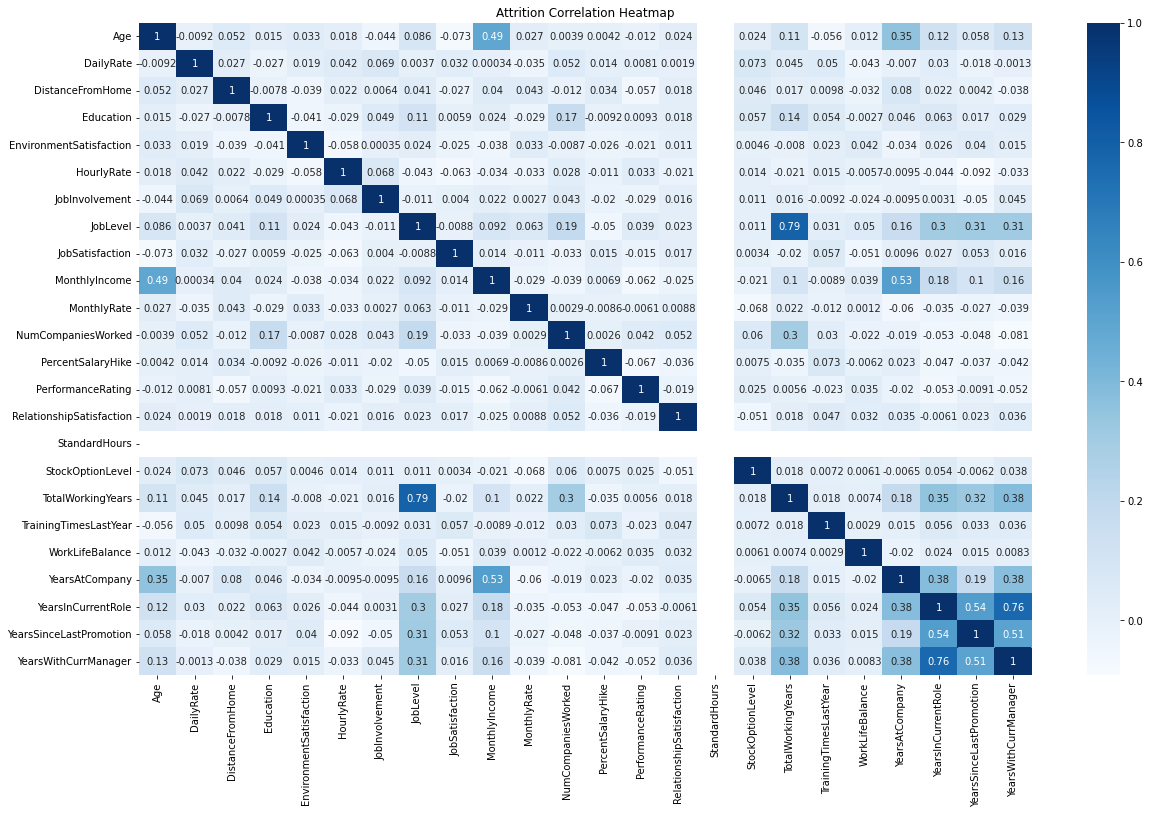

In [ ]:
#Correlation Matrix
#this matrix is printed only for analyzing similar features

corr_matrix = datasetLast.corr()
f , ax = plt.subplots(figsize=(20,12))
ax.set_title("Attrition Correlation Heatmap")
sb.heatmap(corr_matrix,vmax=1.0,cmap='Blues', annot=True)

In [ ]:
#remove the features that showes similar properties 
datasetLast.drop(['YearsWithCurrManager', 'TotalWorkingYears', 'YearsSinceLastPromotion'], axis=1, inplace=True)

#datasetLast.drop(['YearsWithCurrManager', 'TotalWorkingYears', 'YearsSinceLastPromotion','DailyRate', 'HourlyRate',  'MonthlyRate'], axis=1, inplace=True)

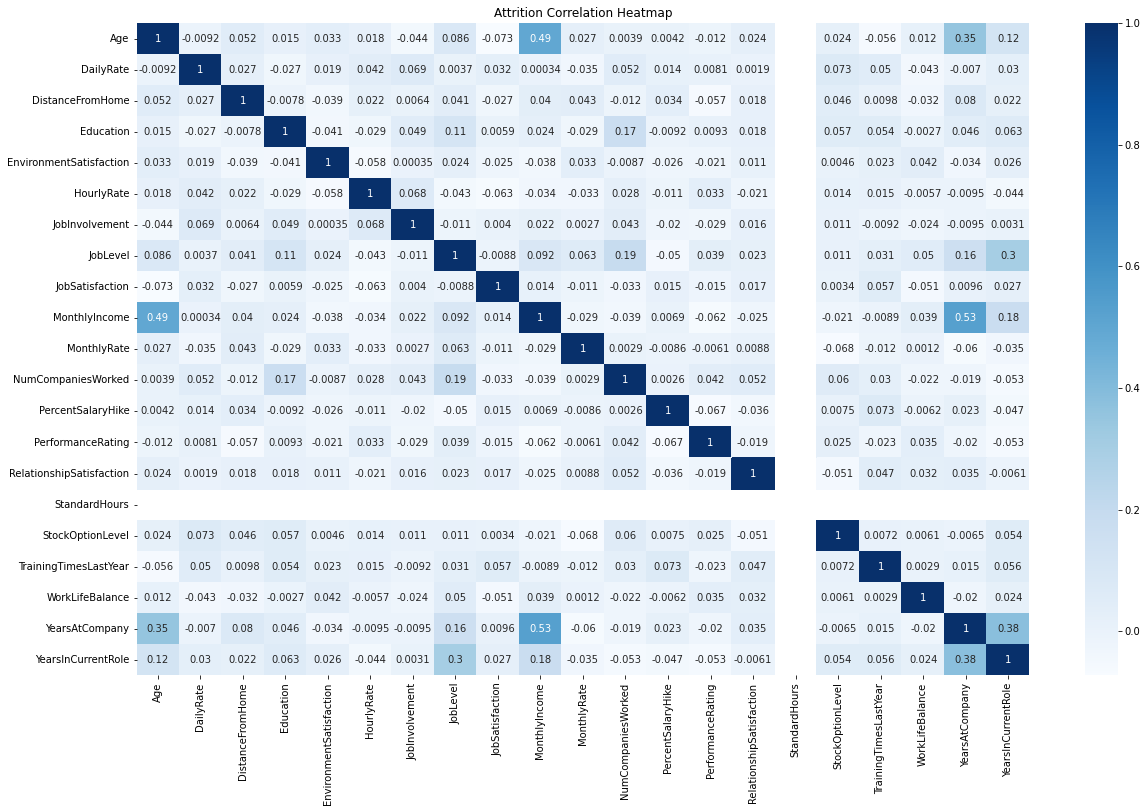

In [ ]:
#Correlation Matrix
#this matrix is printed only for analyzing similar features
corr = datasetLast.corr()

corr_matrix = datasetLast.corr()
f , ax = plt.subplots(figsize=(20,12))
ax.set_title("Attrition Correlation Heatmap")
sb.heatmap(corr_matrix,vmax=1.0,cmap='Blues', annot=True)

## **Handling Missing Values**

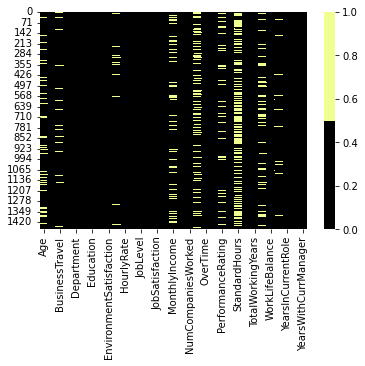

In [ ]:
#Visualize the missing data
cols = dataset.columns
colours = ['#000000', '#f1ff91'] # specify the colours - yellow is missing. black is not missing.
sb.heatmap(dataset[cols].isnull(), cmap=sb.color_palette(colours))

In [ ]:
# % of missing data values.
#datasetLast[col].isnull() returns an array which has boolean values
for col in datasetLast.columns:
    isNull=np.mean(datasetLast[col].isnull())
    if isNull>0.25:
      print(col,":   ",isNull)

Over18 :    0.2995735607675906
StandardHours :    0.4957356076759062


In [ ]:
# drop features that has high missing data rate
datasetLast.drop(['Over18', 'StandardHours'], axis=1, inplace=True)

In [ ]:
#Missing values count
datasetLast.isnull().sum()

Age                         127
Attrition                     0
BusinessTravel               86
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EnvironmentSatisfaction       0
Gender                       46
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome               174
MonthlyRate                   0
NumCompaniesWorked            0
OverTime                      0
PercentSalaryHike             0
PerformanceRating           104
RelationshipSatisfaction      0
StockOptionLevel              0
TrainingTimesLastYear       188
WorkLifeBalance               0
YearsAtCompany               73
YearsInCurrentRole            0
dtype: int64

## **AGE**

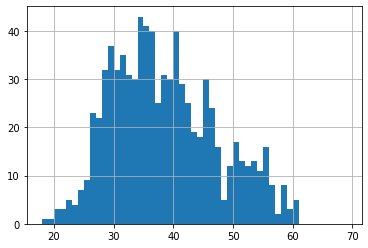

In [ ]:
#current histogram distribution
datasetLast['Age'].hist(bins=np.arange(18, 70, 1))

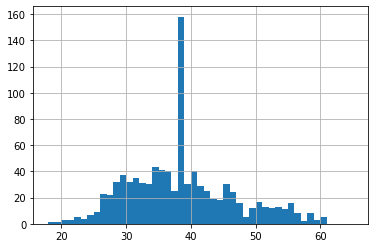

In [ ]:
#why we shouldn't use mean for placing missing values
df_temp1=datasetLast.copy()
fill = df_temp1['Age'].value_counts(normalize=True)
missing = df_temp1['Age'].isnull()
df_temp1.loc[missing,'Age'] = df_temp1['Age'].mean()
df_temp1['Age'].hist(bins=np.arange(18, 66, 1))

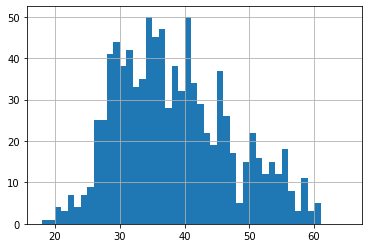

In [ ]:
# instead of mean we use random choice
fill = datasetLast['Age'].value_counts(normalize=True)
missing = datasetLast['Age'].isnull()
datasetLast.loc[missing,'Age'] = np.random.choice(fill.index, size=len(datasetLast[missing]),p=fill.values)
datasetLast['Age'].hist(bins=np.arange(18, 66, 1))

## **Business Travel**

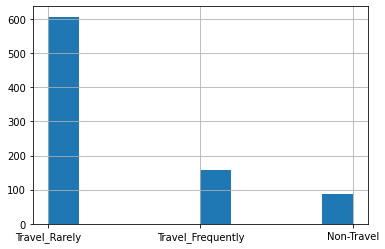

In [ ]:
datasetLast['BusinessTravel'].hist()

Travel_Rarely        662
Travel_Frequently    180
Non-Travel            96
Name: BusinessTravel, dtype: int64

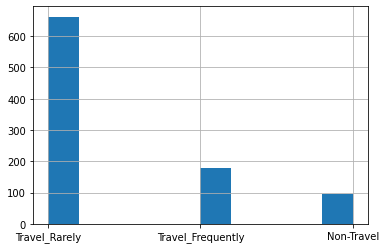

In [ ]:
fill = datasetLast['BusinessTravel'].value_counts(normalize=True)
missing = datasetLast['BusinessTravel'].isnull()
datasetLast.loc[missing,'BusinessTravel'] = np.random.choice(fill.index, size=len(datasetLast[missing]),p=fill.values)
datasetLast['BusinessTravel'].hist()
datasetLast['BusinessTravel'].value_counts()

## **Gender**

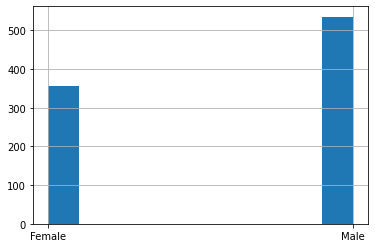

In [ ]:
datasetLast['Gender'].hist()

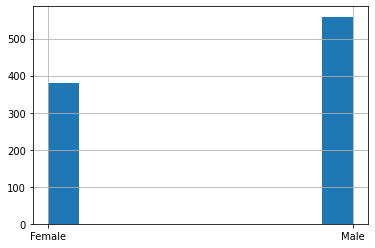

In [ ]:
fill = datasetLast['Gender'].value_counts(normalize=True)
missing = datasetLast['Gender'].isnull()
datasetLast.loc[missing,'Gender'] = np.random.choice(fill.index, size=len(datasetLast[missing]),p=fill.values)
datasetLast['Gender'].hist()

## **Monthly Income**

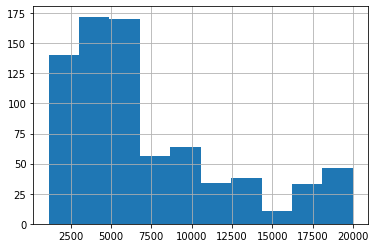

In [ ]:
datasetLast['MonthlyIncome'].hist()

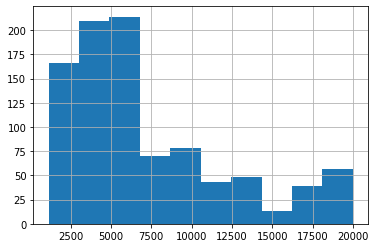

In [ ]:
fill = datasetLast['MonthlyIncome'].value_counts(normalize=True)
missing = datasetLast['MonthlyIncome'].isnull()
datasetLast.loc[missing,'MonthlyIncome'] = np.random.choice(fill.index, size=len(datasetLast[missing]),p=fill.values)
datasetLast['MonthlyIncome'].hist()

## **Performance Rating**

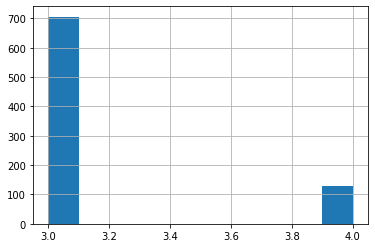

In [ ]:
datasetLast['PerformanceRating'].hist()

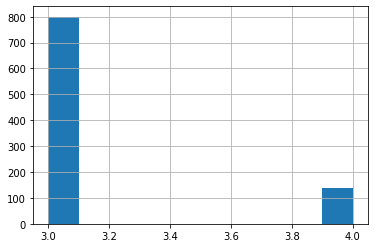

In [ ]:
fill = datasetLast['PerformanceRating'].value_counts(normalize=True)
missing = datasetLast['PerformanceRating'].isnull()
datasetLast.loc[missing,'PerformanceRating'] = np.random.choice(fill.index, size=len(datasetLast[missing]),p=fill.values)
datasetLast['PerformanceRating'].hist()

##**Training Times Last Year**

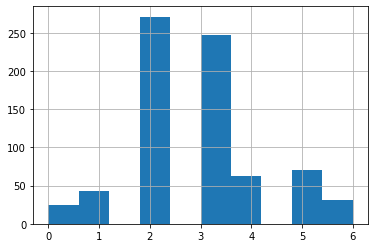

In [ ]:
datasetLast['TrainingTimesLastYear'].hist()

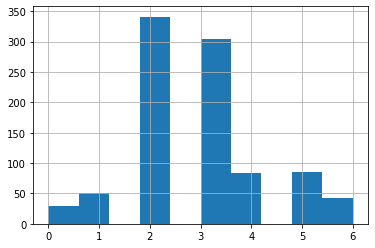

In [ ]:
fill = datasetLast['TrainingTimesLastYear'].value_counts(normalize=True)
missing = datasetLast['TrainingTimesLastYear'].isnull()
datasetLast.loc[missing,'TrainingTimesLastYear'] = np.random.choice(fill.index, size=len(datasetLast[missing]),p=fill.values)
datasetLast['TrainingTimesLastYear'].hist()

## **YearsAtCompany**

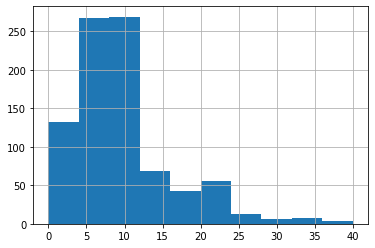

In [ ]:
datasetLast['YearsAtCompany'].hist()

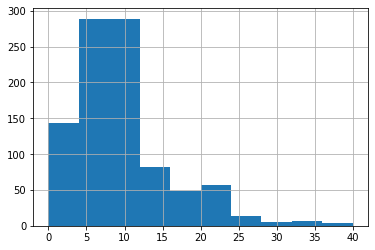

In [ ]:
fill = datasetLast['YearsAtCompany'].value_counts(normalize=True)
missing = datasetLast['YearsAtCompany'].isnull()
datasetLast.loc[missing,'YearsAtCompany'] = np.random.choice(fill.index, size=len(datasetLast[missing]),p=fill.values)
datasetLast['YearsAtCompany'].hist()

In [ ]:
datasetLast['Attrition'] = datasetLast['Attrition'].map({'Yes': 1, 'No': 0})
datasetLast['BusinessTravel'] = datasetLast['BusinessTravel'].map({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2})
datasetLast['OverTime'] = datasetLast['OverTime'].map({'Yes': 1, 'No':0})
datasetLast['Gender'] = datasetLast['Gender'].map({'Female': 1, 'Male':0})
datasetLast['Department'] = datasetLast['Department'].map({'Human Resources':2,'Research & Development': 1, 'Sales':0})
datasetLast['JobRole'] = datasetLast['JobRole'].map({'Laboratory Technician':0, 'Sales Representative':1,
                                                     'Research Scientist':2, 'Manager':3, 'Sales Executive':4,'Research Director':5,
                                                     'Healthcare Representative':6,'Human Resources':7, 'Manufacturing Director':8})

datasetLast['MaritalStatus'] = datasetLast['MaritalStatus'].map({'Divorced':2,'Married': 1, 'Single':0})
datasetLast['EducationField'] = datasetLast['EducationField'].map({'Life Sciences':0, 'Medical':1, 'Technical Degree':2, 'Human Resources':3,
                                                   'Marketing':4, 'Other':5})

In [ ]:
datasetLast.head()

Age  Attrition  ...  YearsAtCompany  YearsInCurrentRole
4   43.0          0  ...            10.0                   2
6   27.0          0  ...             9.0                   3
10  20.0          0  ...             2.0                   0
11  49.0          0  ...             3.0                   2
12  52.0          0  ...            34.0                   9

[5 rows x 28 columns]

In [ ]:
#Array with numerical features
numerical_cols=['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 
                                    'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
                                    'TrainingTimesLastYear', 'YearsAtCompany', 
                                    'YearsInCurrentRole']
from sklearn.preprocessing import minmax_scale

# datasetLast[numerical_cols] = minmax_scale(datasetLast[numerical_cols])

In [ ]:
datasetLast.head()

Age  Attrition  ...  YearsAtCompany  YearsInCurrentRole
4   43.0          0  ...            10.0                   2
6   27.0          0  ...             9.0                   3
10  20.0          0  ...             2.0                   0
11  49.0          0  ...             3.0                   2
12  52.0          0  ...            34.0                   9

[5 rows x 28 columns]

For dimentionality reduction, we combine 3 satistaction column into 1.

In [ ]:
datasetLast['TotalSatisfaction'] = datasetLast['EnvironmentSatisfaction'] + datasetLast['JobSatisfaction'] + datasetLast['RelationshipSatisfaction']

In [ ]:
datasetLast.drop(['EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction'], axis=1, inplace=True)

In [ ]:
datasetLast.shape

(938, 26)

Output new dataset.

In [ ]:
datasetLast.to_csv("./HR_Employee_preprocessed.csv",index=False) 

# MeanShift Algorithm

Silhouette Score(bandwith=0.6): 0.2531274424054552


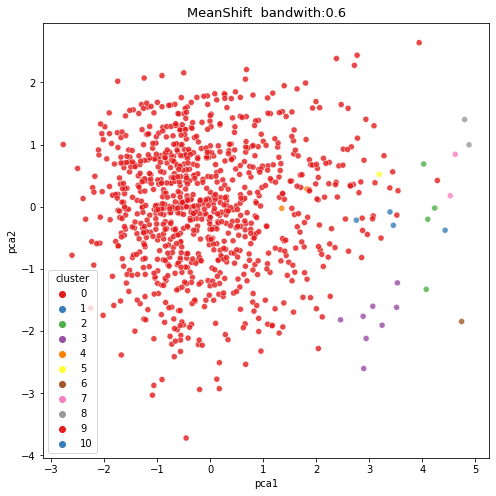

Silhouette Score(bandwith=0.63): 0.24175525979309992


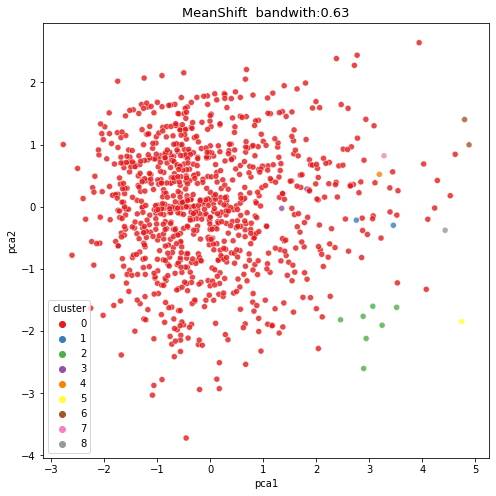

Silhouette Score(bandwith=0.66): 0.2563616613484367


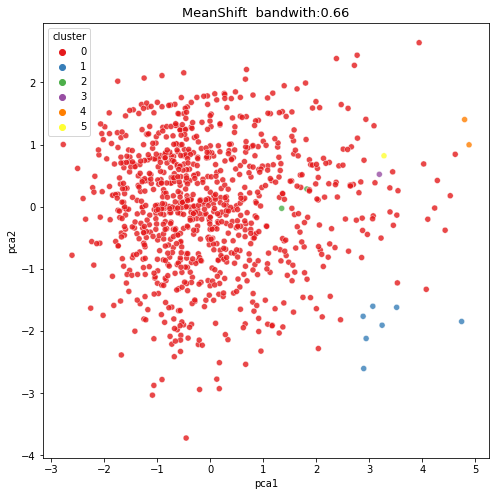

Silhouette Score(bandwith=0.69): 0.37174054208149643


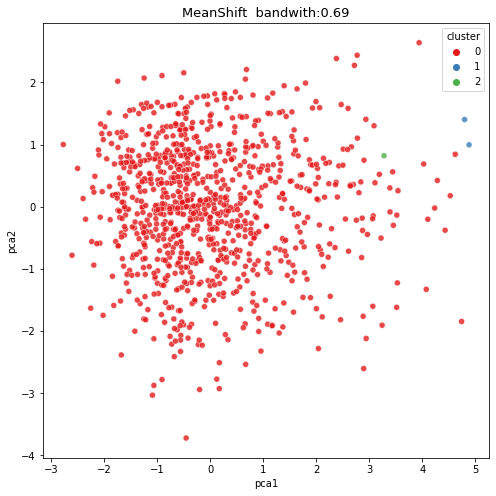

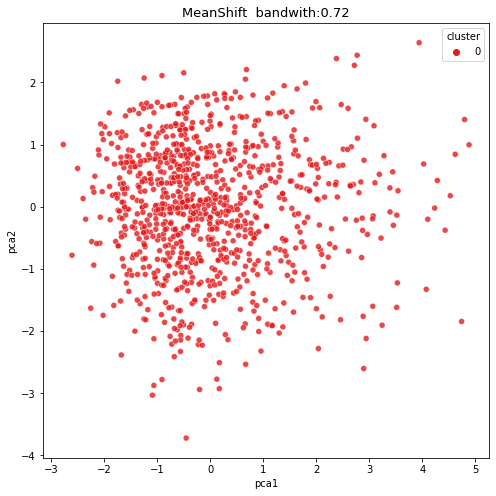

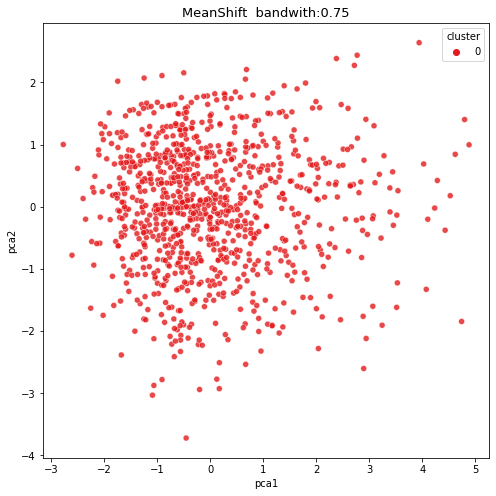

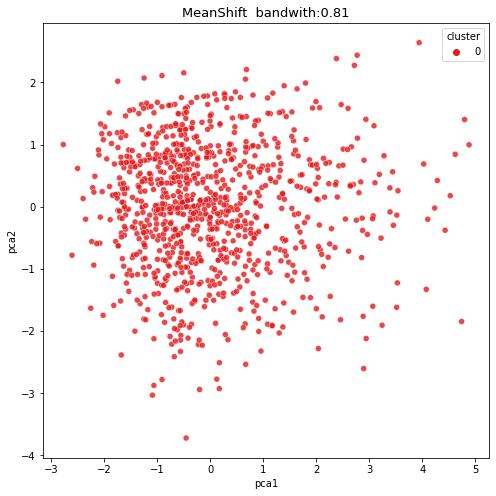

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.cluster as cl
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
 
#checks if two lists are equal
def isEqualList(l1,l2):
    #sort the lists
    x1=sorted(l1)
    x2=sorted(l2)
 
    if x1 == x2:
        return True
    else:
        return False
 
def euclideanDistance(a, b):
    return np.linalg.norm(np.array(a) - np.array(b))
 
def gaussianDistance(x, radius):
    return (1/(radius*np.sqrt(2*np.pi)))*np.exp(-0.5*(x/radius)**2)


# the input value must be normalized in order to 
# obtain for each attribute falls within the same range.
def PCACalculator(dataset,dimCount):

    #calculate mean of the variables
    mean = dataset - np.mean(dataset)

    # Calculate covarianca matrix
    # The covariance matrix is a square matrix that shows the 
    # covariance of the elements with each other.
    covariance = np.cov(mean,rowvar = False)

    # Computes k orthonormal vectors that provide a basis for the normalized input
    # data. These are unit vectors that each point in a direction perpendicular to the others.
    orthogonalValue,orthogonalVector=np.linalg.eigh(covariance) #Eigenvalue - Eigenvector
    
    #In order to find high variability we soth the values.
    index=np.argsort(orthogonalValue)[::-1]
    #So we sorted the values and we have principal components.
    #In here the first indexes will be that has the highest variability.
    sortedOrthogonalVector=orthogonalVector[:,index]
    sortedOrthogonalValue=orthogonalValue[index]
    
    # subset is taken with respect to given parameter
    subset=sortedOrthogonalVector[:,0:dimCount]
     
    #result matrix multiplied with mean
    res=np.dot(subset.transpose(),mean.transpose()).transpose()

    res[:,0] *= -1
     
    return res
 
# read data from csv
def read_data():
    #read and scale data
    data = pd.read_csv('HR_Employee_preprocessed.csv')
    #scale the numerical variables
    return StandardScaler().fit_transform(data.iloc[:,[0,5,14,23,25] ].values)
 
def gaussianShift(p, point,bandwith):
    coor=[0.0 for i in range(len(p))]
    moveRate=0.0
    #iterate all points
    for i in range(len(point)):
        #calculate normal distance
        dist=euclideanDistance(p, point[i])
        #apply gaussian kernel to the distance
        gDistRate=gaussianDistance(dist,bandwith)
        #calculate values for shifting
 
        for k in range(len(coor)):
            coor[k]+=point[i][k]*gDistRate
        moveRate += gDistRate
 
    newList = []
    for x in coor:
        newList.append(x/moveRate)
    return newList
 
def meanShift(data,radius=0.3):
    centerPoints=[]
    #initially all datas are cluster center
    for i in data:
        centerPoints.append(i)
 
    while True:
        newCenterPoints=[]
        x=0
        for i in centerPoints:
            newCenterPoints.append(gaussianShift(i,data,radius))
        oldPoints=centerPoints.copy()
        centerPoints=newCenterPoints
        closeness=euclideanDistance(oldPoints,centerPoints)
        fit=0
        for i in range(len(oldPoints)):
            dist=euclideanDistance(oldPoints[i],centerPoints[i])
            if dist>0.008:
                fit=1
                break
        if fit==1:
            fit=0
            continue
        break
 
    return clusters(centerPoints)
 
def clusters(points):
    labels = []
    labelCount = 0
    centerPoint = []
    labels.append(labelCount)
    centerPoint.append(points[0])
    labelCount += 1
    for i in range(1,len(points)):
        for center in centerPoint:
            dist = euclideanDistance(points[i], center)
            if dist < 0.1:
                labels.append(centerPoint.index(center))
        if len(labels) < i + 1:
            labels.append(labelCount)
            centerPoint.append(points[i])
            labelCount += 1
    return labels
 
#run meanshift and draw graph
def runMeanShift(data,bandwith):
    l=meanShift(data,bandwith)
 
    unique=set(l)
    if len(unique)!=1:
        ss=silhouette_score(data, l)
        print(f'Silhouette Score(bandwith={i}): {ss}')
 
 
    d=data.copy()
    pca_proj = PCACalculator(d,2)
    pca_proj = pd.DataFrame(pca_proj, columns=['pca1', 'pca2'])
    pca_proj['cluster'] = l
    # plot scatter of PCA
    plt.figure(figsize=(8,8))
    sns.scatterplot(
        x="pca1", y="pca2",
        hue='cluster',
        data=pca_proj,
        legend="full",
        alpha=0.8,
        palette="Set1"
    )
    plt.title("MeanShift "+" bandwith:"+str(i), fontsize= 13)
    plt.show()

 
data=read_data()

bandwithList=np.linspace(0.6,0.81,8)

for i in bandwithList:
    l=runMeanShift(data,i)
 

# DBSCAN Algorithm

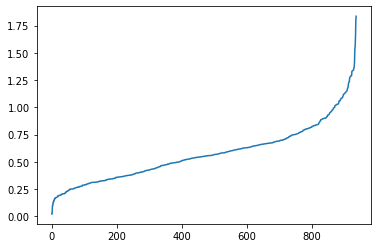

Silhouette Score(epsilon value=0.5,minpts=2.0): -0.26009213968012657 
----------------------------------------------------------
Silhouette Score(epsilon value=0.5,minpts=3.0): -0.3353393403252316 
----------------------------------------------------------
Silhouette Score(epsilon value=0.5,minpts=4.0): -0.3705368312827583 
----------------------------------------------------------
Silhouette Score(epsilon value=0.5,minpts=5.0): -0.32633164650552965 
----------------------------------------------------------
Silhouette Score(epsilon value=0.5,minpts=6.0): -0.31761990992297495 
----------------------------------------------------------
Silhouette Score(epsilon value=0.5,minpts=7.0): -0.30485908177009885 
----------------------------------------------------------
Silhouette Score(epsilon value=0.5,minpts=8.0): -0.25075676446878303 
----------------------------------------------------------
Silhouette Score(epsilon value=0.5,minpts=9.0): -0.22939347188010223 
-----------------------------

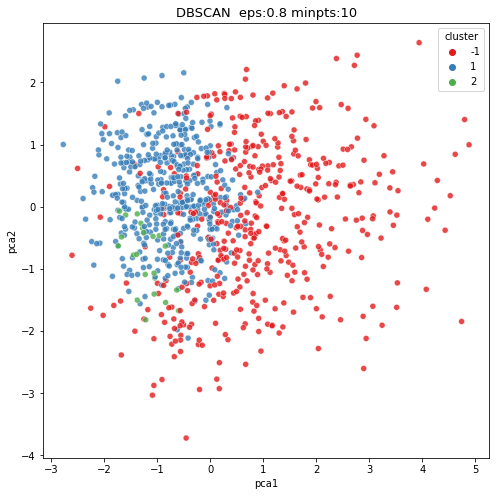

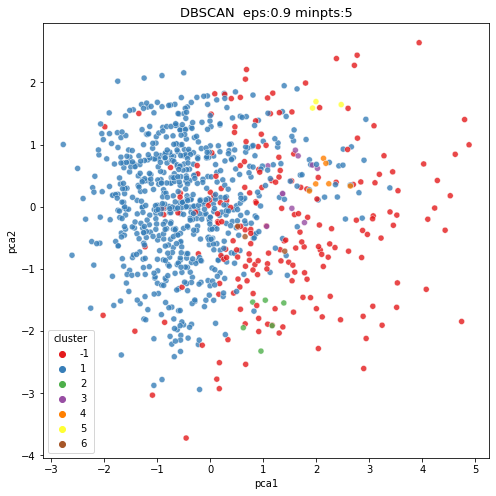

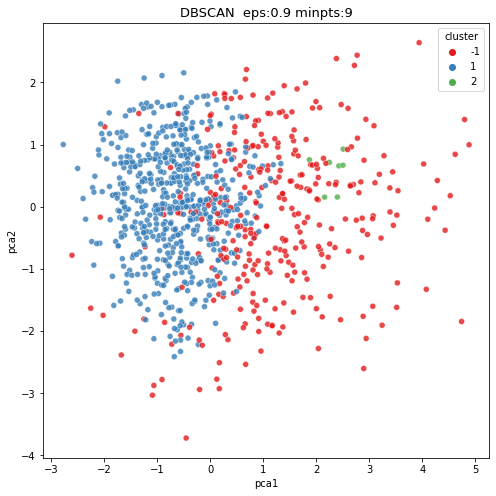

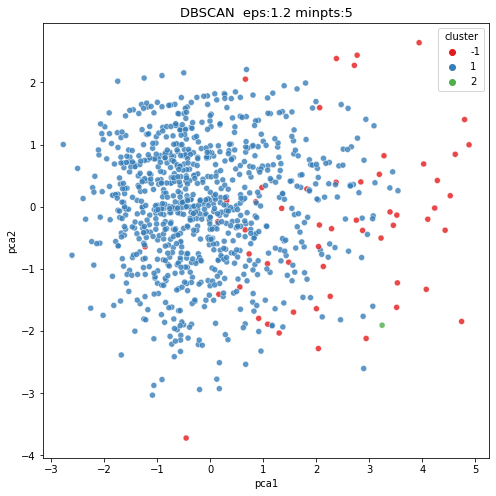

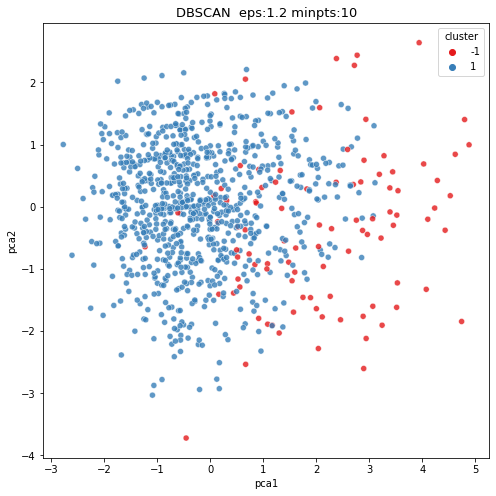

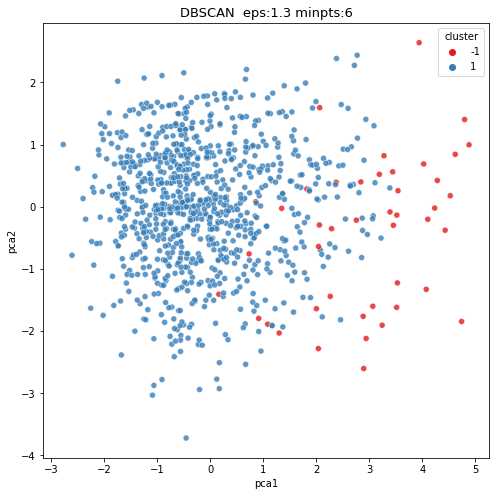

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns


# the input value must be normalized in order to 
# obtain for each attribute falls within the same range.
def PCACalculator(dataset,dimCount):

    #calculate mean of the variables
    mean = dataset - np.mean(dataset)

    # Calculate covarianca matrix
    # The covariance matrix is a square matrix that shows the 
    # covariance of the elements with each other.
    covariance = np.cov(mean,rowvar = False)

    # Computes k orthonormal vectors that provide a basis for the normalized input
    # data. These are unit vectors that each point in a direction perpendicular to the others.
    orthogonalValue,orthogonalVector=np.linalg.eigh(covariance) #Eigenvalue - Eigenvector
    
    #In order to find high variability we soth the values.
    index=np.argsort(orthogonalValue)[::-1]
    #So we sorted the values and we have principal components.
    #In here the first indexes will be that has the highest variability.
    sortedOrthogonalVector=orthogonalVector[:,index]
    sortedOrthogonalValue=orthogonalValue[index]
    
    # subset is taken with respect to given parameter
    subset=sortedOrthogonalVector[:,0:dimCount]
     
    #result matrix multiplied with mean
    res=np.dot(subset.transpose(),mean.transpose()).transpose()

    res[:,0] *= -1
     
    return res



def euclideanDistance(a, b):
    return np.linalg.norm(np.array(a) - np.array(b))

# read data from csv
def read_data():
    #read and scale data
    data = pd.read_csv('./HR_Employee_preprocessed.csv')
    #scale the numerical variables
    return StandardScaler().fit_transform(data.iloc[:,[0,5,14,23,25] ].values)

def DBScan(data,eps,minPts):
    cluster=0
    labels=[]
    unvisited=set()
    candidateSet=set()

    #fill unvisited array
    for i,d in enumerate(data):
        unvisited.add(i)
        labels.append(-2)

    while len(unvisited)!=0:
        n=unvisited.pop()
        neighbours=[]

        #find neighbours
        for i,d in enumerate(data):
            if euclideanDistance(d,data[n])<=eps:
                neighbours.append(i)

        #if point is core point and has more neighbours that minPts
        if len(neighbours)>=minPts:
            #create a new cluster
            cluster+=1
            labels[n]=cluster

            #create a candidate set N
            for i in neighbours:
                candidateSet.add(i)

            #iterate all candidate item
            while len(candidateSet)!=0:
                e=candidateSet.pop()
                if e in unvisited:
                    unvisited.remove(e)
                    #find neighbours
                    neighbours=[]
                    for i,d in enumerate(data):
                        if euclideanDistance(d,data[e])<eps:
                            neighbours.append(i)
                    
                    #if item is a core point ad its neighbours to candidate set
                    if len(neighbours)>=minPts:
                        for i in neighbours:
                                candidateSet.add(i)

                if labels[e]==-2:
                    labels[e]=cluster
        else:
            labels[n]=-1
    return labels

#rundbscan and draw graph
def runDBSCAN(data,eps,minpts):
    l=DBScan(data,eps,minpts)
    d=data.copy()
    pca_proj = PCACalculator(d,2)
    pca_proj = pd.DataFrame(pca_proj, columns=['pca1', 'pca2'])
    pca_proj['cluster'] = l
    # plot scatter of PCA
    plt.figure(figsize=(8,8))
    sns.scatterplot(
        x="pca1", y="pca2",
        hue='cluster',
        data=pca_proj,
        legend="full",
        alpha=0.8,
        palette="Set1"
    )
    plt.title("DBSCAN "+" eps:"+str(eps)+" minpts:"+str(minpts), fontsize= 13)
    plt.show()





data=read_data()



### elbow point for visualising optimal eps values
#######################################################
neighbors = NearestNeighbors(n_neighbors=50)
neighbors_fit = neighbors.fit(data)
distances, indices = neighbors_fit.kneighbors(data)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()
#######################################################


#below code prints all different experiments for obtaning best silhouette_score
########################################################
epsList=np.linspace(0.5,1.3,11)
minptsList=np.linspace(2,10,9)

for i in epsList:
    for j in minptsList:
        l=DBScan(data,i,j)
        resultList=[]
        unique=set(l)
        if(len(unique)!=1):
            ss=silhouette_score(data, l)
            print(f'Silhouette Score(epsilon value={i},minpts={j}): {ss} ')
            resultList.append([ss,i,j])
            print("----------------------------------------------------------")
########################################################


# experiments with different values
runDBSCAN(data,0.8,5)
runDBSCAN(data,0.8,7)
runDBSCAN(data,0.8,10)
runDBSCAN(data,0.9,5)
runDBSCAN(data,0.9,9)
runDBSCAN(data,1.2,5)
runDBSCAN(data,1.2,10)
runDBSCAN(data,1.3,6)

